In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
from tensorflow.keras import Sequential


In [5]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.8154 - loss: 0.6471 - val_accuracy: 0.9494 - val_loss: 0.1696
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.9556 - loss: 0.1443 - val_accuracy: 0.9697 - val_loss: 0.0964
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.9735 - loss: 0.0892 - val_accuracy: 0.9772 - val_loss: 0.0680
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.9800 - loss: 0.0639 - val_accuracy: 0.9819 - val_loss: 0.0560
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.9845 - loss: 0.0519 - val_accuracy: 0.9840 - val_loss: 0.0483
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.9867 - loss: 0.0413 - val_accuracy: 0.9828 - val_loss: 0.0521
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9901 - loss: 0.0337 - val_accuracy: 0.9832 - val_loss: 0.0502
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9903 - loss: 0.0289 - 

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9815 - loss: 0.0559
Test Accuracy: 98.35%


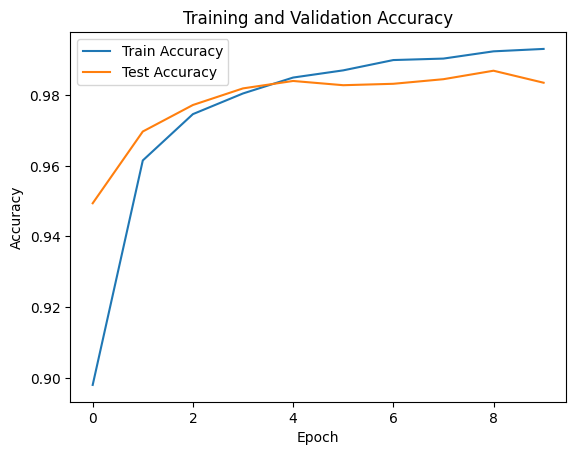

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


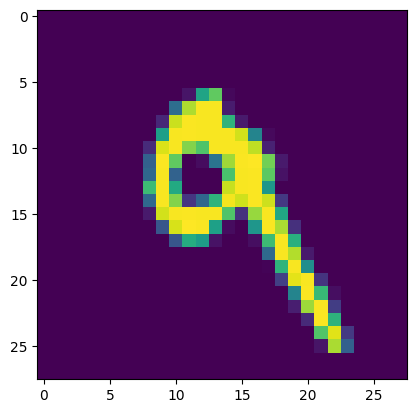

In [9]:
plt.imshow(X_test[7])

In [11]:
import numpy as np
np.argmax(model.predict(X_test[7].reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


np.int64(9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


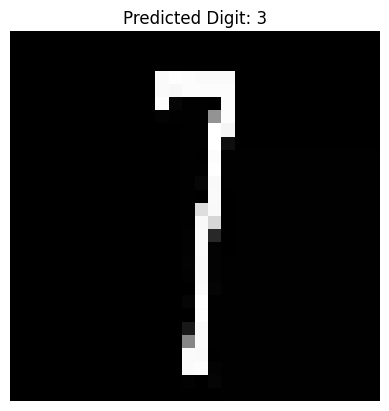

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (put your file path here)
img_path = "/content/seven2.jpeg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize to 28x28
img_resized = cv2.resize(img, (28, 28))

# Invert colors if needed (MNIST has white digit on black)
img_resized = 255 - img_resized

# Normalize to 0-1
img_normalized = img_resized.astype('float32') / 255.0

# Reshape to (1, 28, 28, 1)
img_input = img_normalized.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img_input)
predicted_class = np.argmax(prediction)

# Show image with prediction
plt.imshow(img_resized, cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()
